In [6]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

In [7]:
data = pd.read_csv(r"C:\Users\ADMIN\FPT-PTTK-doan.csv")
print(data)


            Date    Close     Open      High      Low    Vol  Change
0     30/12/2016  15852.0  15707.9   15942.1  15617.8  3.79M   1.27%
1     03/01/2017  16158.2  15960.1   16194.3  15960.1  2.34M   1.93%
2     04/01/2017  16302.3  16140.2   16464.5  16104.2  2.36M   0.89%
3     05/01/2017  16248.3  16284.3   16356.4  16248.3  1.42M  -0.33%
4     06/01/2017  16194.3  16284.3   16392.4  16194.3  1.85M  -0.33%
...          ...      ...      ...       ...      ...    ...     ...
1736  13/12/2023  95200.0  97400.0   97400.0  95200.0  2.15M  -1.65%
1737  14/12/2023  96200.0  95800.0   96400.0  95200.0  1.71M   1.05%
1738  15/12/2023  96200.0  96200.0   96300.0  95000.0  1.47M   0.00%
1739  18/12/2023  94000.0  95900.0   96200.0  93700.0  2.27M  -2.29%
1740  19/12/2023  94600.0  99500.0  100500.0  93500.0  1.25M   0.64%

[1741 rows x 7 columns]


In [8]:
data.describe()


,Close,Open,High,Low
count,1741.000000,1741.000000,1741.000000,1741.000000
mean,48294.222343,48281.861918,48824.384492,47768.114072
std,26926.976138,26938.149626,27248.632274,26609.227177
min,15779.900000,15707.900000,15852.000000,15617.800000
25%,24138.300000,24181.500000,24503.500000,23876.900000
50%,34232.600000,34232.100000,34530.300000,33934.900000
75%,77922.000000,78100.000000,78700.000000,77186.000000
max,99000.000000,99500.000000,100800.000000,98500.000000


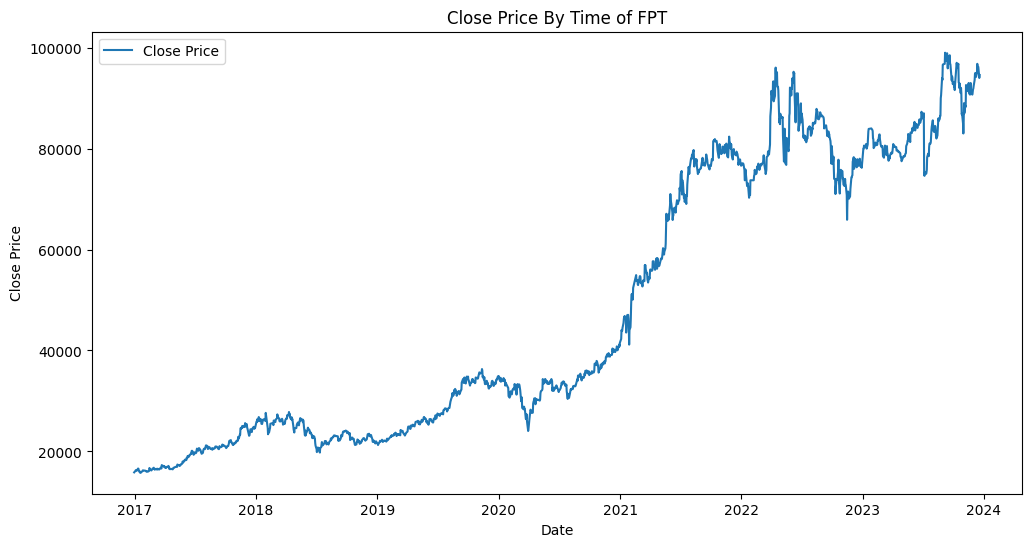

In [15]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data.sort_values(by='Date')
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Close Price By Time of FPT')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [14]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [161]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [162]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [163]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [164]:
#Creating an index for the next 30 days.
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Creating an array of 30 consecutive integers starting from last_index.
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predicting the closing price of the stock for the next 30 days.
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[79187.5795867  79227.94417152 79268.30875635 79308.67334117
 79349.03792599 79389.40251082 79429.76709564 79470.13168046
 79510.49626529 79550.86085011 79591.22543493 79631.59001976
 79671.95460458 79712.3191894  79752.68377423 79793.04835905
 79833.41294387 79873.7775287  79914.14211352 79954.50669834
 79994.87128317 80035.23586799 80075.60045281 80115.96503764
 80156.32962246 80196.69420728 80237.05879211 80277.42337693
 80317.78796175 80358.15254658]


In [165]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 12804.07019062596
Testing RMSE: 17006.80185954029


In [166]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 11721.646734901826
Testing MAE: 15451.298664017058


In [167]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 13.064739214127677
Testing MAPE: 18.793759745365644


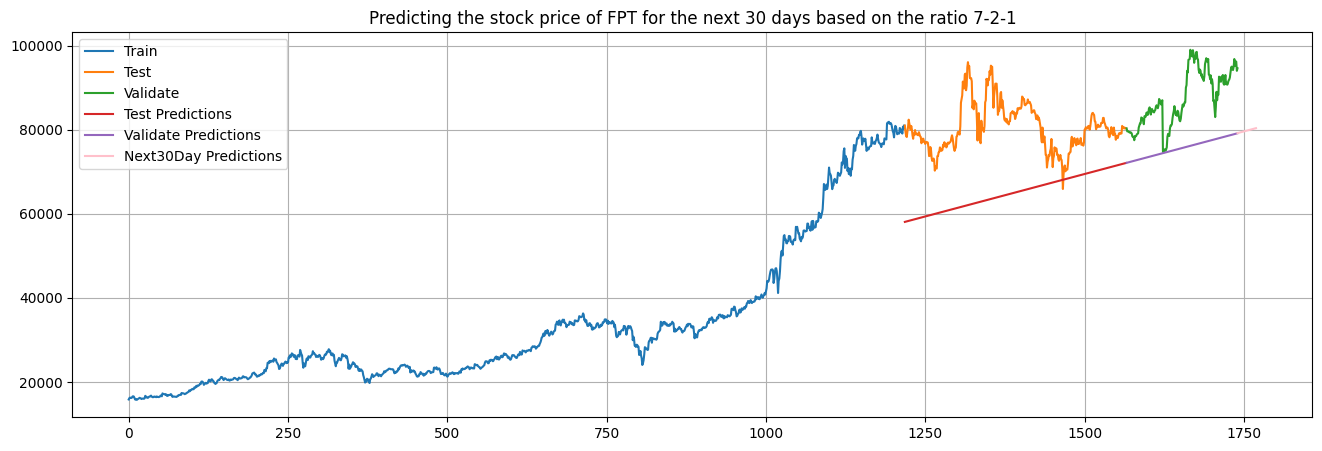

In [215]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Predicting the stock price of FPT for the next 30 days based on the ratio 7-2-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

In [216]:
# Split the data into training, testing, and validation sets
train_size2 = int(0.6 * len(data))
test_size2 = int(0.3 * len(data))
val_size2 = len(data) - train_size2 - test_size2

In [217]:
train_data2 = data[:train_size2]
test_data2 = data[train_size2:train_size2+test_size2]
val_data2 = data[train_size2+test_size2:]

In [218]:
#Training data
x_train2 = np.array(train_data2.index).reshape(-1, 1)
y_train2 = np.array(train_data2['Close'])

# Train the linear regression model
model2 = LinearRegression()
model2.fit(x_train2, y_train2)

LinearRegression()

In [219]:
# Testing data
x_test2 = np.array(test_data2.index).reshape(-1, 1)
y_test2 = np.array(test_data2['Close'])
y_pred2 = model2.predict(x_test2)

#Validate data
x_val2= np.array(val_data2.index).reshape(-1, 1)
y_val2 = np.array(val_data2['Close'])
y_pred_val2 =  model2.predict(x_val2)

In [220]:
#Creating an index for the next 30 days.
last_index2 =  data.index[-1]
last_data2 = pd.RangeIndex(start=last_index2, stop=last_index2+30, step=1)

# Creating an array of 30 consecutive integers starting from last_index.
x_next_30_days2 = np.array(range(last_index2+1, last_index2+31)).reshape(-1, 1)

# Predicting the closing price of the stock for the next 30 days.
y_next_30_days2 = model.predict(x_next_30_days2)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days2)

Predicted closing prices for the next 30 days:
[54656.23933263 54678.61448164 54700.98963065 54723.36477966
 54745.73992867 54768.11507768 54790.49022669 54812.8653757
 54835.24052471 54857.61567372 54879.99082273 54902.36597174
 54924.74112075 54947.11626976 54969.49141877 54991.86656778
 55014.24171679 55036.6168658  55058.99201481 55081.36716382
 55103.74231283 55126.11746184 55148.49261085 55170.86775986
 55193.24290887 55215.61805788 55237.99320689 55260.3683559
 55282.74350491 55305.11865392]


In [221]:
#RMSE
valid_rmse2 = np.sqrt(np.mean((y_pred_val2 - y_val2)**2))
test_rmse2 = np.sqrt(np.mean((y_pred2 - y_test2)**2))
print('Validation RMSE:', valid_rmse2)
print('Testing RMSE:', test_rmse2)

Validation RMSE: 35137.66258918426
Testing RMSE: 32945.150579039066


In [192]:
#MAE
valid_mae2 = mean_absolute_error(y_val2,y_pred_val2)
test_mae2 = mean_absolute_error(y_test2, y_pred2)
print('Validation MAE:', valid_mae2)
print('Testing MAE:', test_mae2)

Validation MAE: 34669.91663739307
Testing MAE: 32157.883325175357


In [193]:
#MAPE
valid_mape2 = np.mean(np.abs((y_val2 - y_pred_val2) / y_val2))*100
test_mape2 = np.mean(np.abs((y_test2 - y_pred2) / y_test2))*100
print('Validation MAPE:', valid_mape2)
print('Testing MAPE:', test_mape2)

Validation MAPE: 39.42237294151851
Testing MAPE: 41.251645072847985


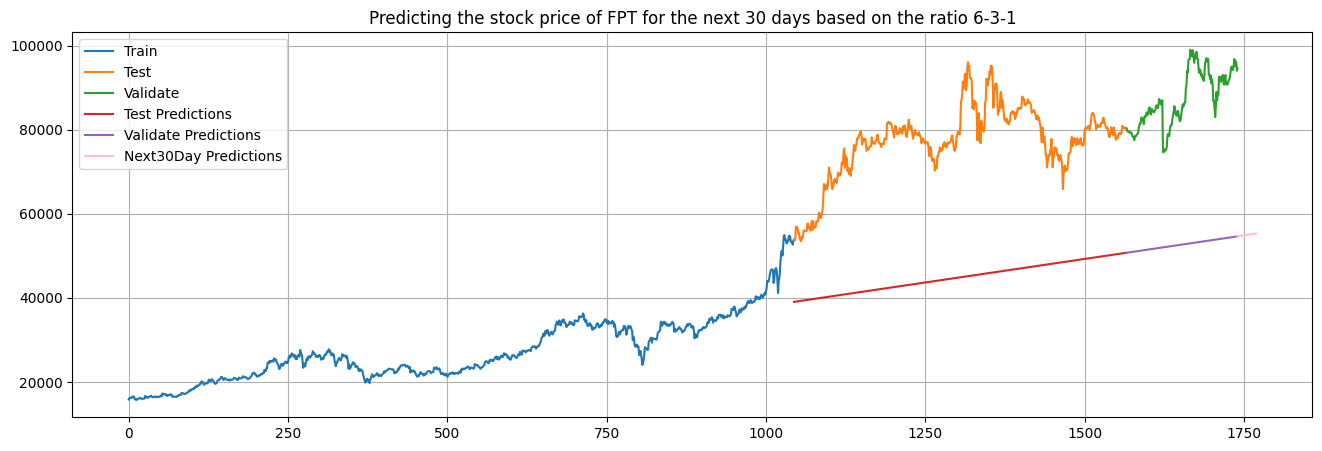

In [222]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Predicting the stock price of FPT for the next 30 days based on the ratio 6-3-1")

plt.plot(train_data2.index, train_data2['Close'])
plt.plot(test_data2.index, test_data2['Close'])
plt.plot(val_data2.index, val_data2['Close'])
plt.plot(test_data2.index, y_pred2)
plt.plot(val_data2.index, y_pred_val2)
plt.plot(last_data2,y_next_30_days2, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

In [ ]:
5:3:2

In [206]:
# Split the data into training, testing, and validation sets
train_size3 = int(0.5 * len(data))
test_size3 = int(0.3 * len(data))
val_size3 = len(data) - train_size3 - test_size3

In [207]:
train_data3 = data[:train_size3]
test_data3 = data[train_size3:train_size3+test_size3]
val_data3 = data[train_size3+test_size3:]

In [208]:
#Training data
x_train3 = np.array(train_data3.index).reshape(-1, 1)
y_train3 = np.array(train_data3['Close'])

# Train the linear regression model
model3 = LinearRegression()
model3.fit(x_train3, y_train3)

LinearRegression()

In [209]:
# Testing data
x_test3 = np.array(test_data3.index).reshape(-1, 1)
y_test3 = np.array(test_data3['Close'])
y_pred3 = model3.predict(x_test3)

#Validate data
x_val3= np.array(val_data3.index).reshape(-1, 1)
y_val3 = np.array(val_data3['Close'])
y_pred_val3 =  model3.predict(x_val3)

In [210]:
#Creating an index for the next 30 days.
last_index3 =  data.index[-1]
last_data3 = pd.RangeIndex(start=last_index3, stop=last_index3+30, step=1)

# Creating an array of 30 consecutive integers starting from last_index.
x_next_30_days3 = np.array(range(last_index3+1, last_index3+31)).reshape(-1, 1)

# Predicting the closing price of the stock for the next 30 days.
y_next_30_days3 = model3.predict(x_next_30_days3)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days3)

Predicted closing prices for the next 30 days:
[48878.30221393 48896.56431978 48914.82642564 48933.08853149
 48951.35063734 48969.61274319 48987.87484904 49006.13695489
 49024.39906074 49042.66116659 49060.92327244 49079.18537829
 49097.44748415 49115.70959    49133.97169585 49152.2338017
 49170.49590755 49188.7580134  49207.02011925 49225.2822251
 49243.54433095 49261.80643681 49280.06854266 49298.33064851
 49316.59275436 49334.85486021 49353.11696606 49371.37907191
 49389.64117776 49407.90328361]


In [211]:
#RMSE
valid_rmse3 = np.sqrt(np.mean((y_pred_val3 - y_val3)**2))
test_rmse3 = np.sqrt(np.mean((y_pred3 - y_test3)**2))
print('Validation RMSE:', valid_rmse3)
print('Testing RMSE:', test_rmse3)

Validation RMSE: 38082.691428568316
Testing RMSE: 30947.59143093513


In [212]:
#MAE
valid_mae3 = mean_absolute_error(y_val3,y_pred_val3)
test_mae3 = mean_absolute_error(y_test3, y_pred3)
print('Validation MAE:', valid_mae3)
print('Testing MAE:', test_mae3)

Validation MAE: 37627.84997762172
Testing MAE: 26065.896742406705


In [213]:
#MAPE
valid_mape3 = np.mean(np.abs((y_val3 - y_pred_val3) / y_val3))*100
test_mape3 = np.mean(np.abs((y_test3 - y_pred3) / y_test3))*100
print('Validation MAPE:', valid_mape3)
print('Testing MAPE:', test_mape3)

Validation MAPE: 44.91109277695103
Testing MAPE: 35.36943876100164


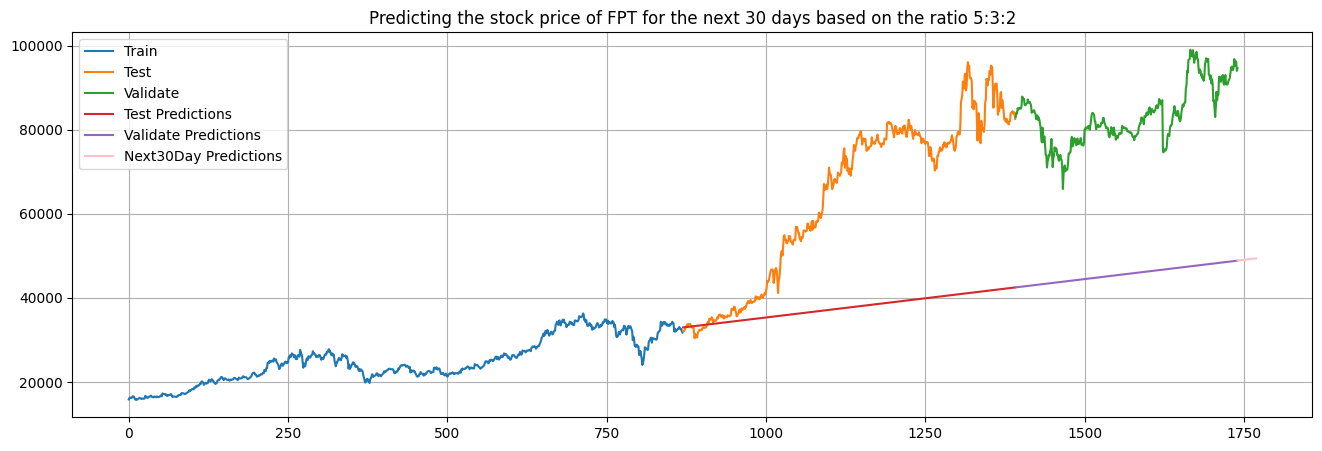

In [214]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Predicting the stock price of FPT for the next 30 days based on the ratio 5:3:2")

plt.plot(train_data3.index, train_data3['Close'])
plt.plot(test_data3.index, test_data3['Close'])
plt.plot(val_data3.index, val_data3['Close'])
plt.plot(test_data3.index, y_pred3)
plt.plot(val_data3.index, y_pred_val3)
plt.plot(last_data3,y_next_30_days3, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

In [ ]:
FPT